In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [95]:
df = pd.read_csv("customer_data.csv")


In [96]:
print(df.head())
print(df.info())


   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 3126.0    15-03-2023   
4                   3997         Wallet                 3003.0    27-11-2022   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  
<class 'pandas.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   str    
 2   Purchas

In [97]:
purchase_data = df["Purchase Amount (USD)"]


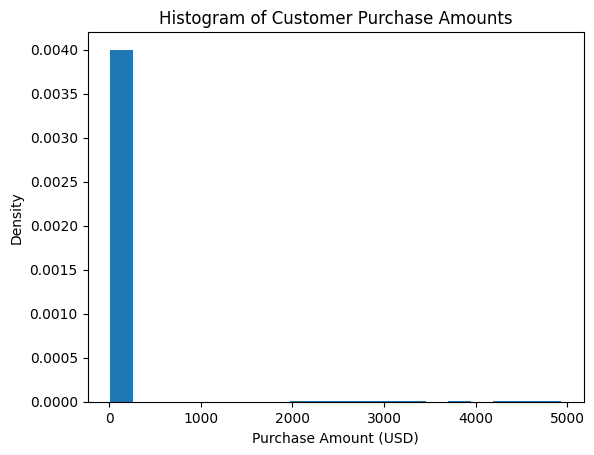

In [98]:
plt.hist(purchase_data, bins=20, density=True)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Density")
plt.title("Histogram of Customer Purchase Amounts")
plt.show()


In [99]:
purchase_data.isnull().sum()
np.isfinite(purchase_data).sum(), len(purchase_data)
purchase_data = pd.to_numeric(purchase_data, errors="coerce")
purchase_data = purchase_data.dropna()
purchase_data = purchase_data[np.isfinite(purchase_data)]

In [100]:

mu, sigma = norm.fit(purchase_data)

print("Mean purchase amount:", mu)
print("Standard deviation:", sigma)



Mean purchase amount: 156.70981818181818
Standard deviation: 419.46038254140893


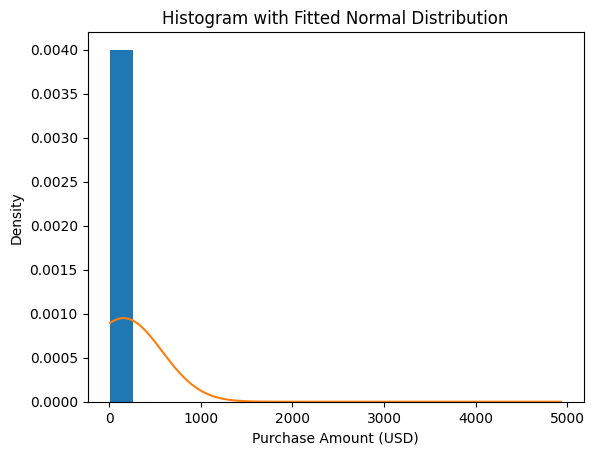

In [101]:
x = np.linspace(purchase_data.min(), purchase_data.max(), 100)
pdf = norm.pdf(x, mu, sigma)

plt.hist(purchase_data, bins=20, density=True)
plt.plot(x, pdf)
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Density")
plt.title("Histogram with Fitted Normal Distribution")
plt.show()


In [102]:
threshold = 100
prob = 1 - norm.cdf(threshold, mu, sigma)

print("Probability of spending above $100:", prob)


Probability of spending above $100: 0.5537719714670981


In [103]:
simulated_sales = np.random.normal(mu, sigma, 1000)


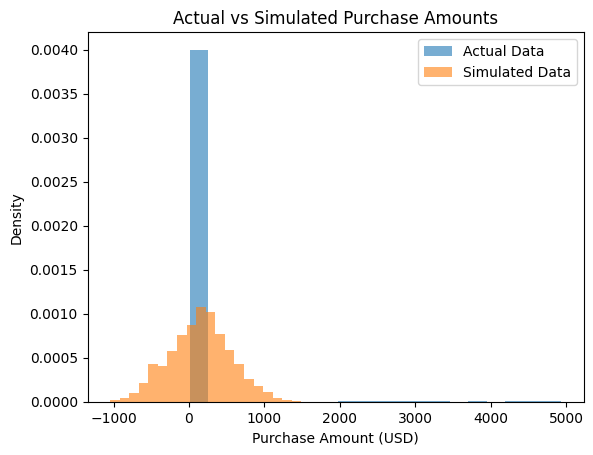

In [104]:
plt.hist(purchase_data, bins=20, density=True, alpha=0.6, label="Actual Data")
plt.hist(simulated_sales, bins=20, density=True, alpha=0.6, label="Simulated Data")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Density")
plt.title("Actual vs Simulated Purchase Amounts")
plt.legend()
plt.show()
